## Setup
We import Pandas and Numpy as usual but will also add Matplotlib and Seaborn for plotting data visualizations.  

In [467]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# input files
FILE_EMPLOYEE = 'data/employee.xlsx'
FILE_GEO = 'data/employee_geo.xlsx'
FILE_BONUS = 'data/employee_bonus.xlsx'

#output files
FILE_EMPLOYEE_DUP = 'data/employee_dup.xlsx'
FILE_OUT = 'data/employee_output.xlsx'

## Ingest Employee Data
Note 100002 and 100006 are duplicates. We will handle it momentarily.


In [468]:
# read spreadsheet
df_employee = pd.read_excel(FILE_EMPLOYEE, sheet_name='input')

# sort records by ascending IDs 
df_employee.sort_values('ID', ascending=True, inplace=True)

# disaply dataframe
# note 100002 and 100006 are duplicates
df_employee

,ID,Lname,Fname,Name,Title
0,100001,Bogey,Hyberts,"Bogey, Hyberts",Associate
1,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director
10,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director
2,100003,Claiborn,Schacter,"Claiborn, Schacter",Director
3,100004,Hildagard,Eberhart,"Hildagard, Eberhart",Manager
4,100005,Welsh,Westerman,"Welsh, Westerman",Associate
5,100006,Wrennie,Platt,"Wrennie, Platt",Associate
11,100006,Wrennie,Platt,"Wrennie, Platt",Associate
6,100007,Barris,Reynales,"Barris, Reynales",Manager
7,100008,Wendye,Cicinelli,"Wendye, Cicinelli",Manager


## Extract Duplicates
We will extraxct the duplicates into a separate file for future auditing.

In [469]:
df_dup = df_employee[df_employee.duplicated(keep='first')]

# output duplicates to spreadsheet before deletion
writer = pd.ExcelWriter(FILE_EMPLOYEE_DUP)
df_dups.to_excel(writer, 'output', index=False)
writer.save()

df_dup

,ID,Lname,Fname,Name,Title
10,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director
11,100006,Wrennie,Platt,"Wrennie, Platt",Associate


## Remove Duplicates

In [470]:
# remove duplicates of IDs except for the first occurence
df_employee.drop_duplicates(subset='ID', keep='first', inplace=True)

df_employee

,ID,Lname,Fname,Name,Title
0,100001,Bogey,Hyberts,"Bogey, Hyberts",Associate
1,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director
2,100003,Claiborn,Schacter,"Claiborn, Schacter",Director
3,100004,Hildagard,Eberhart,"Hildagard, Eberhart",Manager
4,100005,Welsh,Westerman,"Welsh, Westerman",Associate
5,100006,Wrennie,Platt,"Wrennie, Platt",Associate
6,100007,Barris,Reynales,"Barris, Reynales",Manager
7,100008,Wendye,Cicinelli,"Wendye, Cicinelli",Manager
8,100009,Ethe,Slasor,"Ethe, Slasor",Director
9,100010,Valentine,Horsley,"Valentine, Horsley",Associate


## Ingest Geography Data

In [471]:
# Country info is stored in a second spreadsheet
df_geo = pd.read_excel(FILE_GEO, sheet_name='input')

df_geo

,ID,Office
0,100001,USA
1,100002,USA
2,100003,UK
3,100004,UK
4,100005,China
5,100006,China
6,100008,UK
7,100009,China
8,100010,USA


## Ingest Bonus Data
Note 1000007 is missing geography data. Luckily, that person isn't missing the bonus!

In [472]:
# Country info is stored in a second spreadsheet
df_bonus = pd.read_excel(FILE_BONUS, sheet_name='input')

df_bonus

,ID,Bonus
0,100001,94000.0
1,100002,3000.0
2,100003,56000.0
3,100004,63000.0
4,100005,20000.0
5,100006,63000.0
6,100007,65000.0
7,100008,74000.0
8,100009,37000.0
9,100010,31000.0


## Merge Employee, Geography & Bonus Data

In [473]:
# df_employee is on left, df_incoming is on right
df = pd.merge(df_employee, df_geo, how="left", on=['ID'])

df

,ID,Lname,Fname,Name,Title,Office
0,100001,Bogey,Hyberts,"Bogey, Hyberts",Associate,USA
1,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director,USA
2,100003,Claiborn,Schacter,"Claiborn, Schacter",Director,UK
3,100004,Hildagard,Eberhart,"Hildagard, Eberhart",Manager,UK
4,100005,Welsh,Westerman,"Welsh, Westerman",Associate,China
5,100006,Wrennie,Platt,"Wrennie, Platt",Associate,China
6,100007,Barris,Reynales,"Barris, Reynales",Manager,NaN
7,100008,Wendye,Cicinelli,"Wendye, Cicinelli",Manager,UK
8,100009,Ethe,Slasor,"Ethe, Slasor",Director,China
9,100010,Valentine,Horsley,"Valentine, Horsley",Associate,USA


In [474]:
# df_employee is on left, df_incoming is on right
df = pd.merge(df, df_bonus, how="left", on=['ID'])

df

,ID,Lname,Fname,Name,Title,Office,Bonus
0,100001,Bogey,Hyberts,"Bogey, Hyberts",Associate,USA,94000.0
1,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director,USA,3000.0
2,100003,Claiborn,Schacter,"Claiborn, Schacter",Director,UK,56000.0
3,100004,Hildagard,Eberhart,"Hildagard, Eberhart",Manager,UK,63000.0
4,100005,Welsh,Westerman,"Welsh, Westerman",Associate,China,20000.0
5,100006,Wrennie,Platt,"Wrennie, Platt",Associate,China,63000.0
6,100007,Barris,Reynales,"Barris, Reynales",Manager,NaN,65000.0
7,100008,Wendye,Cicinelli,"Wendye, Cicinelli",Manager,UK,74000.0
8,100009,Ethe,Slasor,"Ethe, Slasor",Director,China,37000.0
9,100010,Valentine,Horsley,"Valentine, Horsley",Associate,USA,31000.0


## Check for Nulls
Let's make sure everyone is covered. We will replace NaN with "N/A". Doing so makes downstream reporting easier.

In [475]:
# check for any nulls anywhere
df.isnull().values.any()

True

In [476]:
# show where the nulls are 
df.isnull()

,ID,Lname,Fname,Name,Title,Office,Bonus
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [477]:
# replace nulls with "N/A"
df = df.fillna('N/A')

df

,ID,Lname,Fname,Name,Title,Office,Bonus
0,100001,Bogey,Hyberts,"Bogey, Hyberts",Associate,USA,94000.0
1,100002,Mireielle,Lindauer,"Mireielle, Lindauer",Director,USA,3000.0
2,100003,Claiborn,Schacter,"Claiborn, Schacter",Director,UK,56000.0
3,100004,Hildagard,Eberhart,"Hildagard, Eberhart",Manager,UK,63000.0
4,100005,Welsh,Westerman,"Welsh, Westerman",Associate,China,20000.0
5,100006,Wrennie,Platt,"Wrennie, Platt",Associate,China,63000.0
6,100007,Barris,Reynales,"Barris, Reynales",Manager,N/A,65000.0
7,100008,Wendye,Cicinelli,"Wendye, Cicinelli",Manager,UK,74000.0
8,100009,Ethe,Slasor,"Ethe, Slasor",Director,China,37000.0
9,100010,Valentine,Horsley,"Valentine, Horsley",Associate,USA,31000.0


## Drop Column(s)

In [478]:
df.drop(['Name'], axis=1, inplace=True)

df

,ID,Lname,Fname,Title,Office,Bonus
0,100001,Bogey,Hyberts,Associate,USA,94000.0
1,100002,Mireielle,Lindauer,Director,USA,3000.0
2,100003,Claiborn,Schacter,Director,UK,56000.0
3,100004,Hildagard,Eberhart,Manager,UK,63000.0
4,100005,Welsh,Westerman,Associate,China,20000.0
5,100006,Wrennie,Platt,Associate,China,63000.0
6,100007,Barris,Reynales,Manager,N/A,65000.0
7,100008,Wendye,Cicinelli,Manager,UK,74000.0
8,100009,Ethe,Slasor,Director,China,37000.0
9,100010,Valentine,Horsley,Associate,USA,31000.0


## Save Export Data

In [479]:
writer = pd.ExcelWriter(FILE_OUT)
df.to_excel(writer, 'output', index=False)
writer.save()

In [480]:
pd.pivot_table(df, index=['Office'], values=['Bonus'], aggfunc=[np.sum])

,sum
,Bonus
Office,
China,120000.0
N/A,65000.0
UK,193000.0
USA,128000.0


## Visualize Data

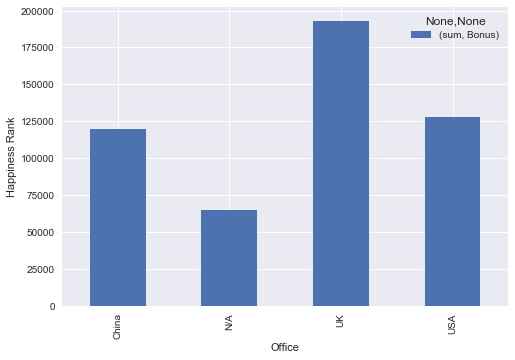

In [481]:
sns.set()
pd.pivot_table(df, index=['Office'], values=['Bonus'], aggfunc=[np.sum]).plot(kind= 'bar')
plt.ylabel("Happiness Rank")

In [482]:
pd.pivot_table(df, index=['Office', 'Title'], values=['Bonus'], aggfunc=[np.mean])

mean
                    Bonus
Office Title             
China  Associate  41500.0
       Director   37000.0
N/A    Manager    65000.0
UK     Director   56000.0
       Manager    68500.0
USA    Associate  62500.0
       Director    3000.0

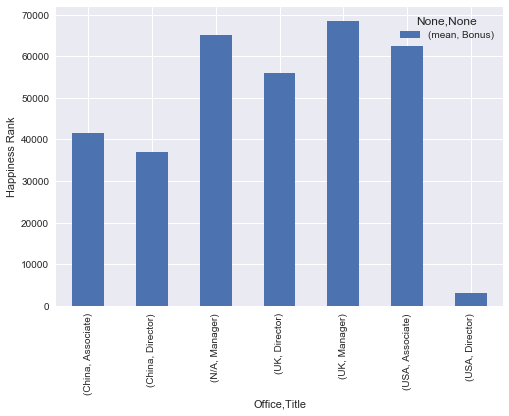

In [483]:
pd.pivot_table(df, index=['Office', 'Title'], values=['Bonus'], aggfunc=[np.mean]).plot(kind= 'bar')
plt.ylabel("Happiness Rank")

In [484]:
pd.pivot_table(df, index=['Office', 'Title'], values=['Bonus'], aggfunc=[np.mean])

mean
                    Bonus
Office Title             
China  Associate  41500.0
       Director   37000.0
N/A    Manager    65000.0
UK     Director   56000.0
       Manager    68500.0
USA    Associate  62500.0
       Director    3000.0

In [485]:
pd.pivot_table(df, index=['Office'], columns=['Title'], values=['Bonus'], aggfunc=[np.sum])

sum                   
           Bonus                   
Title  Associate Director   Manager
Office                             
China    83000.0  37000.0       NaN
N/A          NaN      NaN   65000.0
UK           NaN  56000.0  137000.0
USA     125000.0   3000.0       NaN

In [486]:
pd.pivot_table(df, index=['Office'], values=['Bonus', 'ID'], aggfunc={'Bonus':[np.mean, np.sum], 'ID':len})

Bonus            ID
                mean       sum len
Office                            
China   40000.000000  120000.0   3
N/A     65000.000000   65000.0   1
UK      64333.333333  193000.0   3
USA     42666.666667  128000.0   3

In [487]:
pd.pivot_table(df, index=['Office'], columns=['Title'], values=['Bonus'], aggfunc=[np.sum], margins=True)

sum                             
           Bonus                             
Title  Associate Director   Manager       All
Office                                       
China    83000.0  37000.0       NaN  120000.0
N/A          NaN      NaN   65000.0   65000.0
UK           NaN  56000.0  137000.0  193000.0
USA     125000.0   3000.0       NaN  128000.0
All     208000.0  96000.0  202000.0  506000.0

In [488]:
pd.pivot_table(df, index=['Office'], values=['Bonus', 'ID'], aggfunc=[len], fill_value=0, margins=True, dropna=False)

len      
       Bonus    ID
Office            
China    3.0   3.0
N/A      1.0   1.0
UK       3.0   3.0
USA      3.0   3.0
All     10.0  10.0

In [489]:
pd.pivot_table(df, index=['Office'], values=['Bonus', 'ID'], aggfunc={'Bonus':[np.mean, np.sum, np.min, np.max], 'ID':len})

Bonus                                   ID
           amax     amin          mean       sum len
Office                                              
China   63000.0  20000.0  40000.000000  120000.0   3
N/A     65000.0  65000.0  65000.000000   65000.0   1
UK      74000.0  56000.0  64333.333333  193000.0   3
USA     94000.0   3000.0  42666.666667  128000.0   3

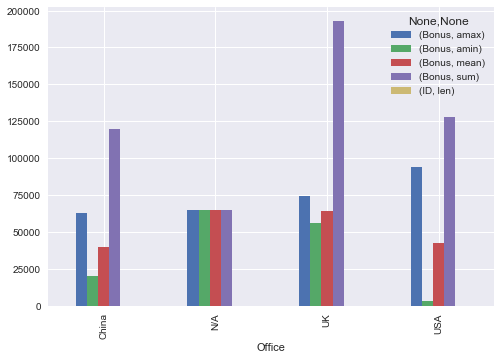

In [490]:
pd.pivot_table(df, index=['Office'], values=['Bonus', 'ID'], aggfunc={'Bonus':[np.mean, np.sum, np.min, np.max], 'ID':len}).plot(kind= 'bar')

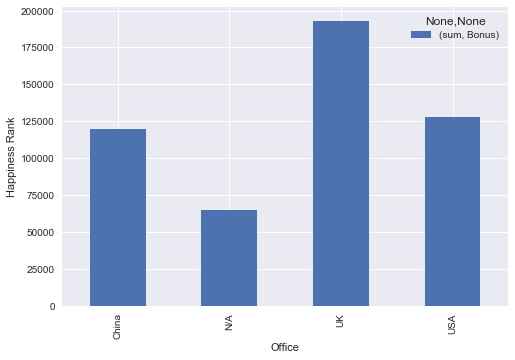

In [491]:
sns.set()
pd.pivot_table(df, index=['Office'], values=['Bonus'], aggfunc=[np.sum]).plot(kind= 'bar')
plt.ylabel("Happiness Rank")

In [492]:
t123 = pd.pivot_table(df, index=['Office'], values=['Bonus'], aggfunc=[np.sum])

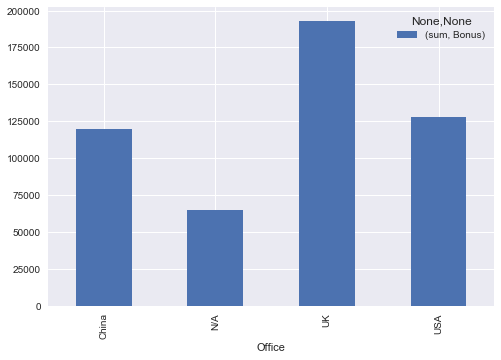

In [493]:
t123.plot(kind='bar')

In [494]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cols = ['Office', 'Title']
count_unique(df, cols)


For column Office
UK       3
China    3
USA      3
N/A      1
Name: Office, dtype: int64

For column Title
Associate    4
Director     3
Manager      3
Name: Title, dtype: int64


## Visualize Data 1

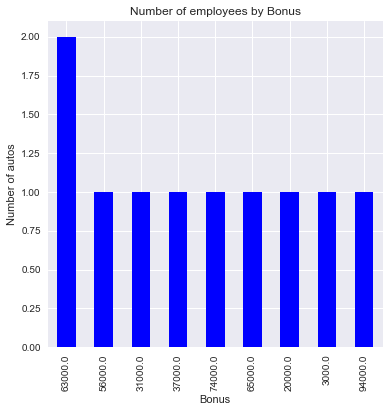

In [495]:
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of employees by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

plot_cols = ['Bonus']
plot_bars(df, plot_cols) 

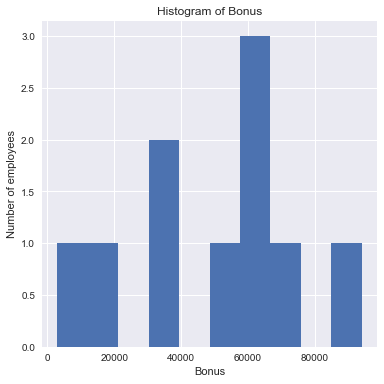

In [496]:
def plot_histogram(df, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        df[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of employees')# Set text for y axis
        plt.show()
        
num_cols = ['Bonus']    
plot_histogram(df, num_cols)